In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the Titanic datasets
train_url = "C:/Users/DELL 7480/Downloads/titanic csv/train.csv"
test_url = "C:/Users/DELL 7480/Downloads/titanic csv/test.csv"
gender_submission_url = "C:/Users/DELL 7480/Downloads/titanic csv/gender_submission.csv"

In [3]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)
gender_submission_df = pd.read_csv(gender_submission_url)

In [5]:
# Display basic information about the datasets
print("Train dataset:")
print(train_df.head())

Train dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [6]:
print("\nTest dataset:")
print(test_df.head())


Test dataset:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [7]:
print("\nGender Submission dataset:")
print(gender_submission_df.head())


Gender Submission dataset:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [8]:
# Combine the train and test datasets for comprehensive data preprocessing
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [9]:
# Data cleaning and preprocessing
def preprocess_data(df):
    # Drop unnecessary columns
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    # Handling missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Feature engineering
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

    return df

In [10]:
combined_df = preprocess_data(combined_df)

In [11]:
# Separate the train and test datasets
train_df = combined_df.iloc[:train_df.shape[0]]
test_df = combined_df.iloc[train_df.shape[0]:]

In [13]:
# Explore the preprocessed train dataset
print("\nPreprocessed Train dataset:")
print(train_df.head())


Preprocessed Train dataset:
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0       0.0       3    male  22.0      1      0   7.2500        S           2   
1       1.0       1  female  38.0      1      0  71.2833        C           2   
2       1.0       3  female  26.0      0      0   7.9250        S           1   
3       1.0       1  female  35.0      1      0  53.1000        S           2   
4       0.0       3    male  35.0      0      0   8.0500        S           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


In [14]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   FamilySize  891 non-null    int64  
 9   IsAlone     891 non-null    int32  
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 66.3+ KB
None


In [15]:
# Explore the preprocessed test dataset
print("\nPreprocessed Test dataset:")
print(test_df.head())


Preprocessed Test dataset:
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
891       NaN       3    male  34.5      0      0   7.8292        Q   
892       NaN       3  female  47.0      1      0   7.0000        S   
893       NaN       2    male  62.0      0      0   9.6875        Q   
894       NaN       3    male  27.0      0      0   8.6625        S   
895       NaN       3  female  22.0      1      1  12.2875        S   

     FamilySize  IsAlone  
891           1        1  
892           2        0  
893           1        1  
894           1        1  
895           3        0  


In [16]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    0 non-null      float64
 1   Pclass      418 non-null    int64  
 2   Sex         418 non-null    object 
 3   Age         418 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Fare        418 non-null    float64
 7   Embarked    418 non-null    object 
 8   FamilySize  418 non-null    int64  
 9   IsAlone     418 non-null    int32  
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 31.2+ KB
None


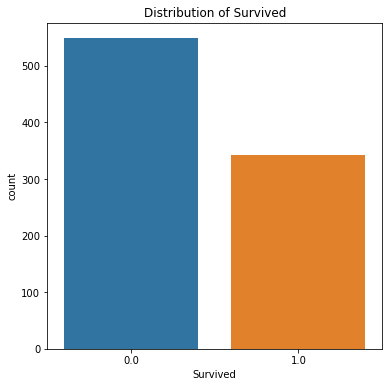

In [17]:
# Visualize the distribution of 'Survived' in the train dataset
plt.figure(figsize=(6, 6))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survived')
plt.show()

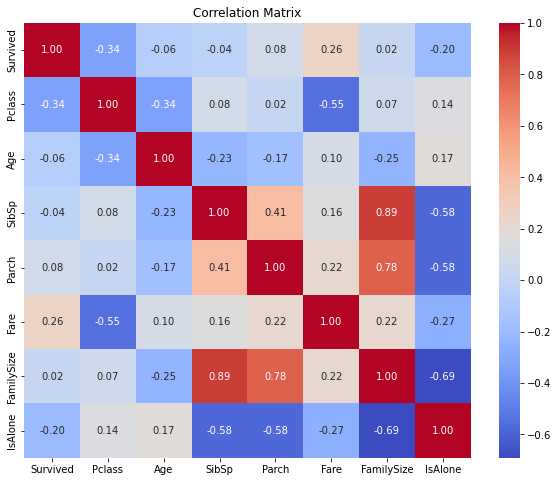

In [18]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Feature transformation
numeric_features = ['Age', 'Fare', 'FamilySize']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'Embarked', 'IsAlone']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [20]:
# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [21]:
# Split the dataset into training and testing sets
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('Survived', axis=1)

Random Forest was chosen for the Titanic dataset due to its effectiveness in handling non-linear relationships, feature importance analysis, and robustness against overfitting. Its ensemble nature, aggregating predictions from multiple decision trees, makes it well-suited for predicting survival outcomes based on diverse passenger features. 

In [22]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare',
                                                   'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'IsAlone'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
# Explore the predictions
submission_df = pd.DataFrame({'PassengerId': test_df.index, 'Survived': y_pred})
print("\nPredictions for the Test dataset:")
print(submission_df.head())


Predictions for the Test dataset:
   PassengerId  Survived
0          891       0.0
1          892       0.0
2          893       0.0
3          894       1.0
4          895       1.0


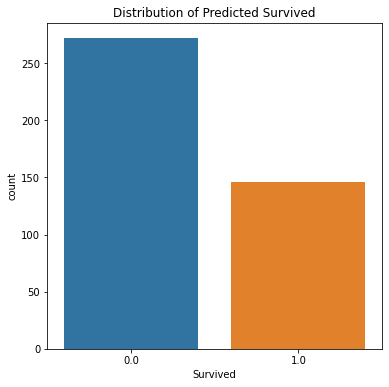

In [27]:
# Visualize the distribution of predicted 'Survived' values
plt.figure(figsize=(6, 6))
sns.countplot(x='Survived', data=submission_df)
plt.title('Distribution of Predicted Survived')
plt.show()